In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings("ignore")

In [29]:
df = pd.read_csv("hello.csv")

In [30]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [31]:
df.Ship_name.nunique()

138

In [32]:
df.shape

(158, 9)

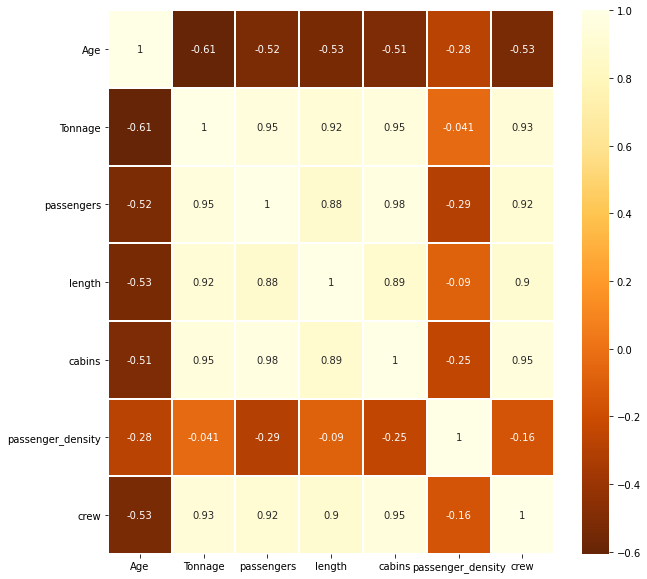

In [33]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(), annot = True, linewidths=1, cmap="YlOrBr_r")
plt.show()

In [34]:
df.corr()["crew"].sort_values(ascending = False)[1:]

cabins               0.950823
Tonnage              0.927569
passengers           0.915234
length               0.895857
passenger_density   -0.155509
Age                 -0.530657
Name: crew, dtype: float64

In [46]:
finalized_col = df[["cabins", "Tonnage", "passengers", "length", "Age"]]
num_col = df.drop(columns = ["Ship_name" , "Cruise_line"])

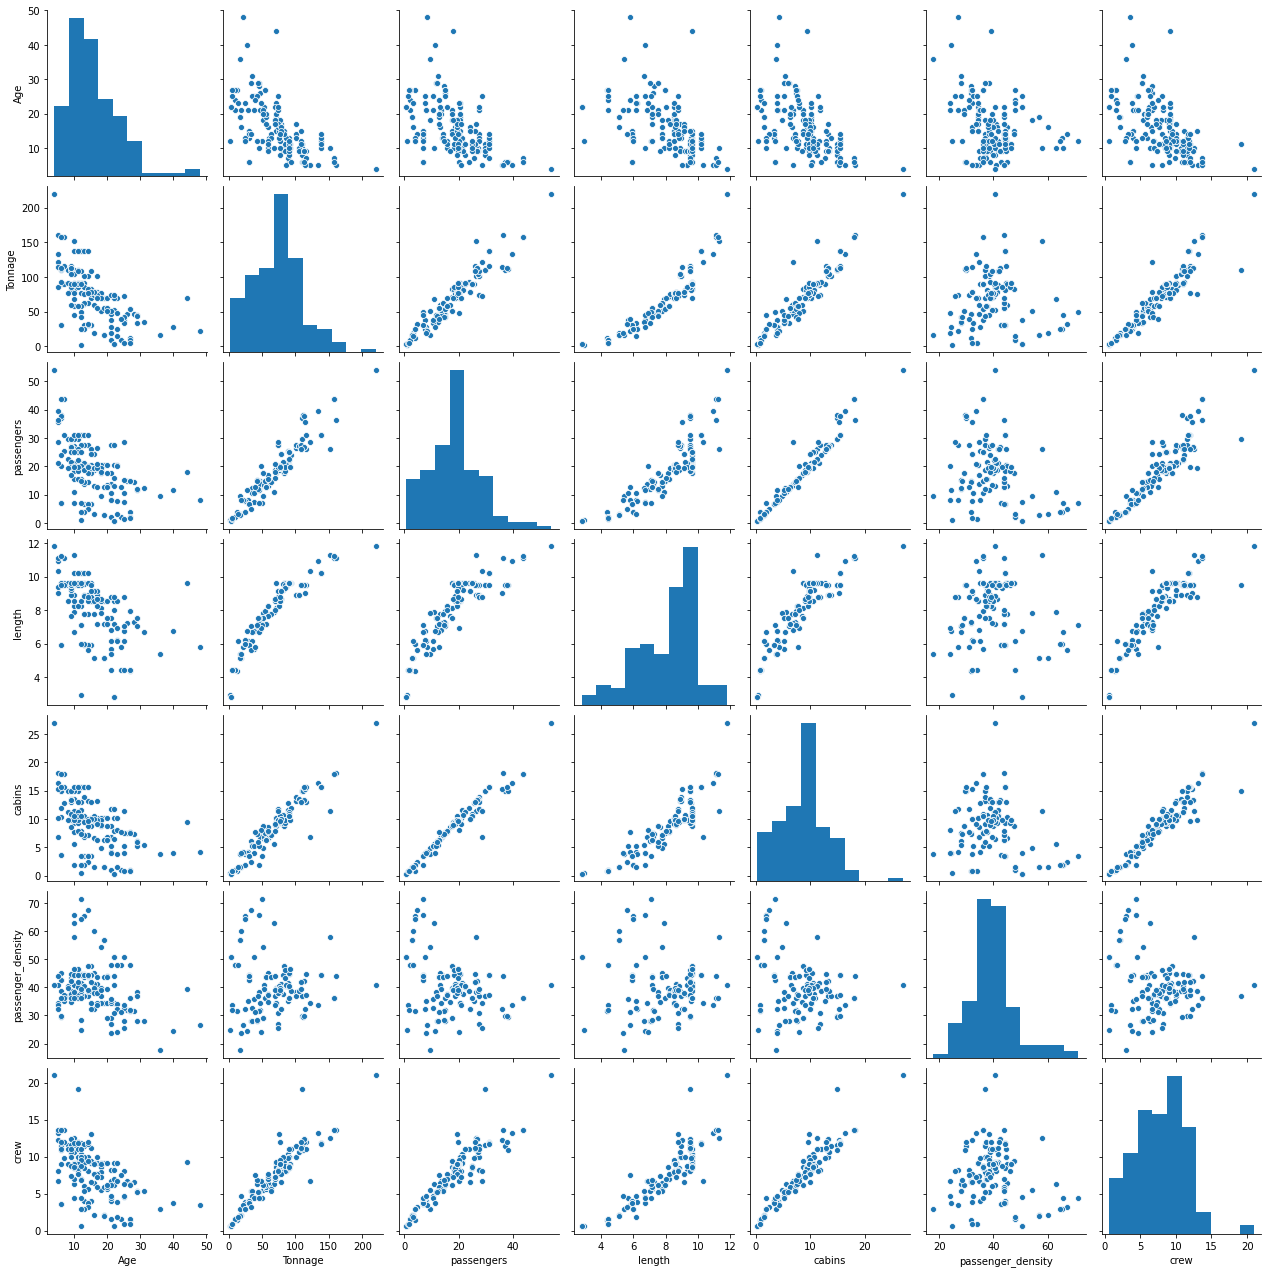

In [41]:
sns.pairplot(num_col)

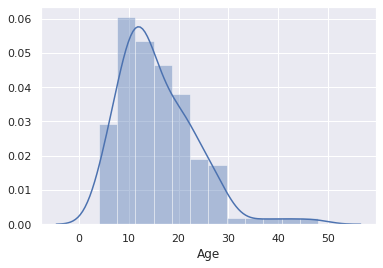

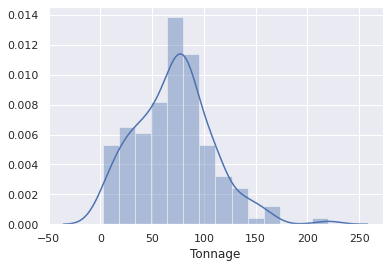

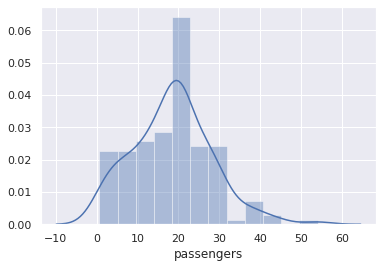

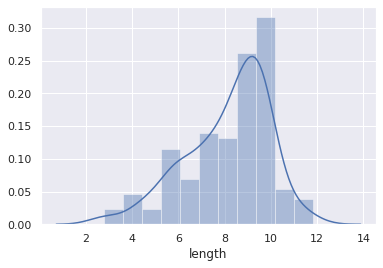

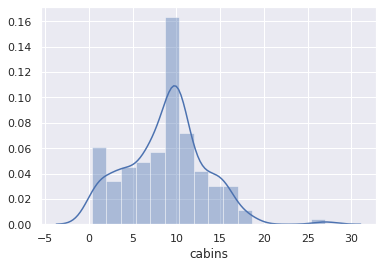

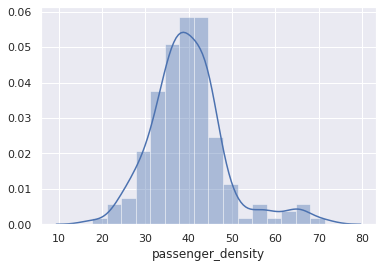

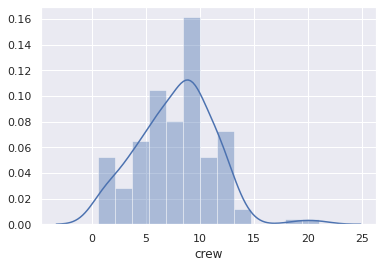

In [42]:
sns.set()
for i in num_col.columns.to_list():
  sns.distplot(num_col[i])
  plt.show()

In [43]:
from sklearn import (
    model_selection,
    linear_model,
    tree,
    ensemble
)

In [50]:
X = finalized_col
y = df["crew"]
# Fitting the linear regression
lr = linear_model.LinearRegression()
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = lr.predict(X_test)

In [53]:
# Evaluating the  lr
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score is ", round(r2_score(y_test, y_pred), 2))

R2 score is  0.95


In [54]:
y_pred.shape

(32,)

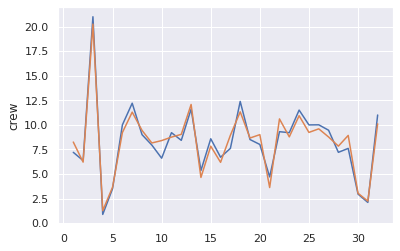

In [55]:
temp = [i for i in range(1, 33)]
sns.lineplot(temp, y_test)
sns.lineplot(temp, y_pred)
plt.show()